In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

mag = pd.read_csv(r"C:\Users\cacam\Downloads\Job2_2024-06-21T03-16-34-079.csv", delimiter=',')

samples = mag['Sample']
times = mag['Time (s)']
voltages = mag['Voltage 0 (V)']


seis = pd.read_csv(r"C:\Users\cacam\Downloads\seismo.csv", delimiter=',')

sam = seis['Sample']
tim = seis['Time (s)']
z = seis['Channel Z (V)']
n = seis['Channel N (V)']
e = seis['Channel E (V)']

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout


x = times 
y = voltages 

def plot_with_slider(xlim):
    
    window_size = 10
    y_smoothed = y.rolling(window=window_size).mean()
    plt.figure(figsize=(17, 5))   ## dpi breaks slider
    plt.plot(x, y_smoothed, linewidth = 1.5)
    plt.xlim(xlim, xlim + 0.5)   
    plt.ylim(y.min() - 0.0005, y.max() + 0.0005) 
    #plt.axhline()
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (times[len(times)-1]), step = 0.5, value = 0, layout=Layout(width='450px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='450px'), max=22.799961, …

<function __main__.plot_with_slider(xlim)>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from ipywidgets import FloatSlider
from ipywidgets import Layout


x1 = tim 
y1 = z
y2 = n
y3 = e

def plot_with_slider(xlim):

    plt.figure(figsize=(17, 5))   ## dpi breaks slider
    
    ax = plt.axes()
    ax.set_facecolor("dimgrey")
    
    plt.plot(x1, y1, linewidth = 1.5, color = 'limegreen', label = 'Z')
    plt.plot(x1, y2, linewidth = 1.5, color = 'red', label = 'N')
    plt.plot(x1, y3, linewidth = 1.5, color = 'blue', label = 'E')
    
    plt.xlim(xlim, xlim + 0.5)   
    plt.ylim(y.min() - 2, y.max() + 4) 
    #plt.axhline()
    plt.grid(True)
    plt.show()


interact(plot_with_slider, xlim = FloatSlider(min = 0, max = (tim[len(tim)-1]), step = 0.5, value = 0, layout=Layout(width='450px')))


interactive(children=(FloatSlider(value=0.0, description='xlim', layout=Layout(width='450px'), max=17.066602, …

<function __main__.plot_with_slider(xlim)>

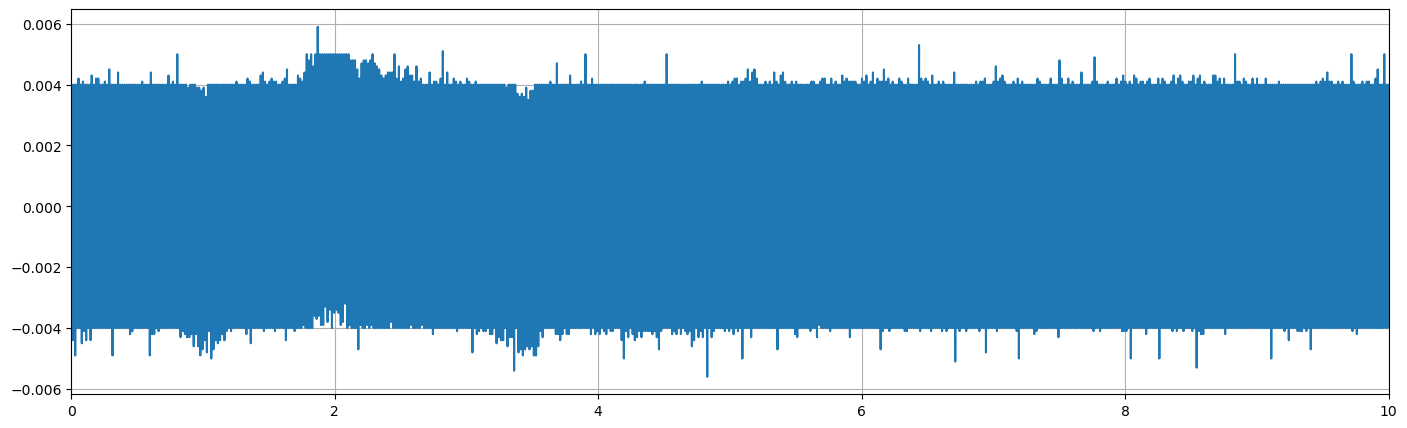

In [7]:
start = 0  ##in terms of seconds 
end = 10   # times[len(times)-1]

i = 0
j = 0

for i in range(0, len(times)):
    if times[i] == start:
        alpha = samples[i]
        
for j in range(0, len(times)):
    if times[j] == end:
        beta = samples[j]

t = times[alpha:beta]
v = voltages[alpha:beta]


window_size = 10
v_smoothed = v.rolling(window=window_size).mean()

plt.figure(figsize = (17, 5))
plt.plot(t,v_smoothed)

plt.xlim(start,end)
plt.grid(True)

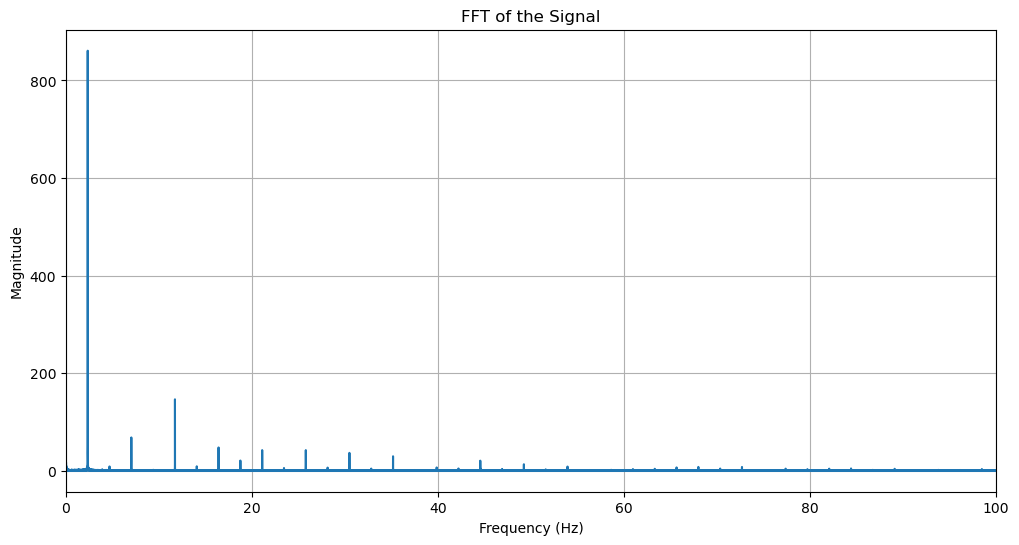

In [18]:
signal = mag['Voltage 0 (V)'].values  
time = mag['Time (s)'].values  


fft_result = np.fft.fft(signal)


fs = 1000  # sampling frequency in Hz
frequencies = np.fft.fftfreq(len(signal), 1/fs)

plt.figure(figsize = (12, 6))
plt.plot(frequencies, np.abs(fft_result))

plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.xlim(0,100)
plt.grid(True)
plt.show()

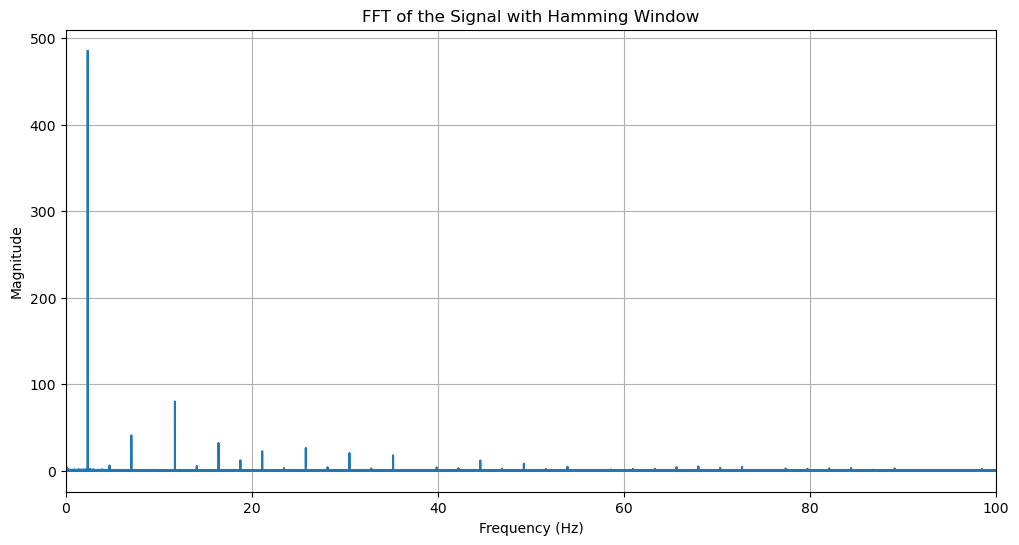

In [19]:
from scipy.signal import get_window

# Select the window function
window_type = 'hamming'  # Change this to 'hamming', 'blackman', etc.

# Apply the window to the signal
window = get_window(window_type, len(signal))
windowed_signal = signal * window

# Compute the FFT
fft_result = np.fft.fft(windowed_signal)

# Compute the frequencies corresponding to the FFT result
fs = 1000  # Replace with your actual sampling frequency in Hz
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Plot the FFT result
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_result))
plt.title(f'FFT of the Signal with {window_type.capitalize()} Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0,100)
plt.grid(True)
plt.show()
